# Santiago Gabriel Vallejo García A01631816
# Julio Arath Rosales Oliden A01630738

In [4]:
import pandas as pd
#abrir el csv
df_review=pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
#conseguir 1000 datos de positivos y negativos
df_positivo=df_review[df_review['sentiment']=='positive'][:1000]
df_negativo=df_review[df_review['sentiment']=='negative'][:1000]
df_review_des=pd.concat([df_positivo,df_negativo])
print(df_review.value_counts('sentiment'))
print(f'----')
print(df_review_des.value_counts('sentiment'))

sentiment
negative    25000
positive    25000
dtype: int64
----
sentiment
negative    1000
positive    1000
dtype: int64


In [6]:
#hacemos split para el test y el train
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_review_des, test_size=.33,random_state=42)

train_x,train_y=train['review'], train['sentiment']
test_x,test_y=test['review'], test['sentiment']


In [7]:
#bag of words- usando vectores 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#ejemplo para ver como funciona 
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names())
df_dtm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amo,codigo,código,el,en,escribir,java,odio,python
review1,2,1,1,1,2,1,0,0,2
review2,0,1,1,1,2,1,2,2,0


In [8]:
#term frequency 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names())
df_dtm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amo,codigo,código,el,en,escribir,java,odio,python
review1,0.576152,0.204969,0.204969,0.204969,0.409937,0.204969,0.000000,0.000000,0.576152
review2,0.000000,0.204969,0.204969,0.204969,0.409937,0.204969,0.576152,0.576152,0.000000


In [9]:
#pasar de texto a numero
#aqui si se usa stop words 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

test_x_vector = tfidf.transform(test_x)
train_x_vector#vamos a ver el tamaño 

<1340x20202 sparse matrix of type '<class 'numpy.float64'>'
	with 116136 stored elements in Compressed Sparse Row format>

In [10]:
#svm - clasificador geometrico que busca incrementar la frontera entre dos grupos 
from sklearn.svm import SVC

svc = SVC(kernel='linear')#creandolo
svc.fit(train_x_vector, train_y)#entrenandolo

#3 simples predicciones 
print("Resultado de buena película: ")
print(svc.predict(tfidf.transform(['A good movie']))) #buena pelicula
print("Resultado de excelente película: ")
print(svc.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print("Resultado de mala película: ")
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto


Resultado de buena película: 
['positive']
Resultado de excelente película: 
['positive']
Resultado de mala película: 
['negative']


In [11]:
#árbol de decisión - toma decisiones con muchas decisiones simples de inferencia de los datos
#por lo que es más sencillo visualizarlo

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

#3 simples predicciones 
print("Resultado de buena película: ")
print(dec_tree.predict(tfidf.transform(['A good movie']))) #buena pelicula
print("Resultado de excelente película: ")
print(dec_tree.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print("Resultado de mala película: ")
print(dec_tree.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto



Resultado de buena película: 
['positive']
Resultado de excelente película: 
['positive']
Resultado de mala película: 
['positive']


In [12]:
#metodo de aprendizaje supervisado que usa el teorema de bayes 
#toma que las predicciones son independientes entre cada par de features en su respectiva clase 

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()#crea el clasificador
print("Clase de entranmiento naive bayes")
gnb.fit(train_x_vector.toarray(), train_y)#lo entrena 
#print(gnb.score(test_x_vector.toarray(), test_y))

Clase de entranmiento naive bayes


GaussianNB()

In [13]:
#se crea un modelo con regresion logistica para dar un modelo lineal para reducir un error 
#que en este caso usa suma de la distancia cuadrada a la linea de todos los puntos (rmse)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()#crear el modelo 
lr.fit(train_x_vector, train_y)#entrenar el modelo 

#3 simples predicciones 
print("Resultado de buena película: ")
print(lr.predict(tfidf.transform(['A good movie']))) #buena pelicula
print("Resultado de excelente película: ")
print(lr.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print("Resultado de mala película: ")
print(lr.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto


Resultado de buena película: 
['negative']
Resultado de excelente película: 
['positive']
Resultado de mala película: 
['negative']


In [14]:
#comparar todos 
print("Score for SVC:")
print(svc.score(test_x_vector, test_y))
print("Score for dec tree:")
print(dec_tree.score(test_x_vector, test_y))
print("Score for naive bayes:")
print(gnb.score(test_x_vector.toarray(), test_y))
print("Score for linear:")
print(lr.score(test_x_vector, test_y))

Score for SVC:
0.8378787878787879
Score for dec tree:
0.6818181818181818
Score for naive bayes:
0.6287878787878788
Score for linear:
0.8121212121212121


In [15]:
#sacamos el f-score 
# fScore=2*(Presicion*recall)/(precision+recall)

from sklearn.metrics import f1_score
print("f1 score casos [positivos, negativos]")
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

f1 score casos [positivos, negativos]


array([0.8410104 , 0.83462133])

In [16]:
#Re´prte de clasificacion 
from sklearn.metrics import classification_report
#Representación númerica de los casos de exitos y fallos de cada etiqueta

print(classification_report(test_y, svc.predict(test_x_vector),
                      labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.87      0.81      0.83       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.87      0.81      0.83       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660

[[283  42]
 [ 65 270]]


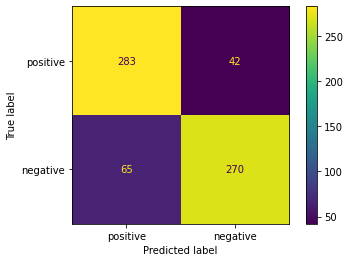

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


paremetros = {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, paremetros, cv=5)
svc_grid.fit(train_x_vector, train_y)
#Representación númerica de los casos de exitos y fallos de cada etiqueta
svc_matrix = confusion_matrix(test_y, svc_grid.predict(test_x_vector),
                      labels=['positive', 'negative'])
#Métricas de rendimiento del svc_grid
print(classification_report(test_y, svc_grid.predict(test_x_vector),
                      labels=['positive', 'negative']))
#Representación visual de los casos de exitos y fallos de cada etiqueta
ConfusionMatrixDisplay(svc_matrix, display_labels=['positive', 'negative']).plot()
#True Negative RAte
TNR = svc_matrix[1][1] / (svc_matrix[1][1] + svc_matrix[0][1])
print("El True Negative Rate del svc es: " + str(TNR))
print("El True Negative rate es cuantas observaciones de todas las negativas se clasificaron correctamente.")
#print(svc_grid.best_estimator_)
#print(svc_grid.best_params_)
#svc_grid.best_score_ 

# Usamos svm porque era el que mejor resultados con aprox 84 de accuracy y decidimos mostrar varias metricas entre las cuales destaca, recall ya que nos permite ver cuantos verdaderos tenemos tomando en cuenta los falsos negativos, por lo que podemos ver la calidad de la predicción. 

# Siendo en este caso 87 de los casos positivos y 81 en los casos negativos, ya que nos queremos enfocar en la calidad de los resultados positivos mientras que otras metricas como presicion nos diran solo la cantidad de positivos 


## positivos = tp/(tp+fn)

## negativos = tn/(tn+fp)